In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')
import math


In [25]:
# reading the data set of unemployment rate in the US from the year of 1948 to 2017
fr = pd.read_excel('USA umemployment rate 1948-2017.xlsx')
fr.head()


,Year,Period,Value
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [26]:
# change the name 'value' to 'unemployment rate'.
fr = fr.rename(columns={'Value':'Unemployment Rate'})
fr.head()


,Year,Period,Unemployment Rate
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [27]:
# create a new table for each year and its average unemployment rate
data = pd.DataFrame(fr['Year'].unique(), columns=['Year'])
data.head()


,Year
0,1948
1,1949
2,1950
3,1951
4,1952


In [28]:
# find the average unemployment rate for every year(do the summation of the rate of every 12 months and find its mean)
sum=0
average=[]
n=0
for x in range(len(data)):
    for y in range(n,len(fr)):
        if(fr['Year'][y] == data['Year'][x]):
            sum += fr['Unemployment Rate'][y]
        else:
            average.append(sum/12)
            n=y
            sum=0
            break
        if(y == 839): # y will never reach 840, so without this condition, the else condition above will not be activate
            average.append((sum/12))


In [29]:
average[0:5]

[3.75, 6.05, 5.208333333333333, 3.2833333333333337, 3.0250000000000004]

In [30]:
# combine the data i.e year with unemployment rate average
data['Unemployment Rate'] = pd.DataFrame(average, columns=['Unemployment Rate'])

# round the rate to 2 decimal place
data['Unemployment Rate'] = data['Unemployment Rate'].round(2)

data.head()

,Year,Unemployment Rate
0,1948,3.75
1,1949,6.05
2,1950,5.21
3,1951,3.28
4,1952,3.03


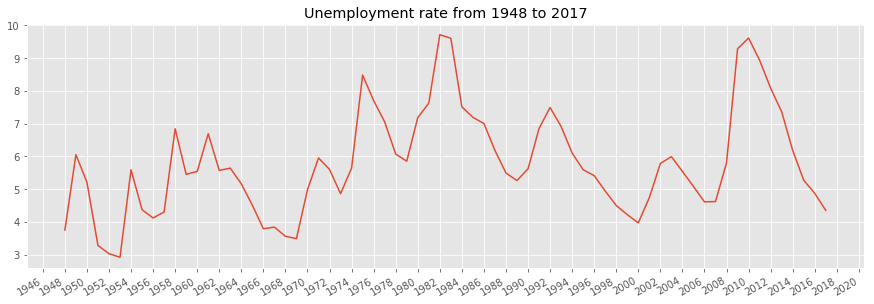

In [31]:
# graph the data
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data['Year'], data['Unemployment Rate'])

# show the year with more detail
ax.locator_params(nbins=70, axis='x')

# italic the values in the x axis
fig.autofmt_xdate()

plt.title('Unemployment rate from 1948 to 2017')
plt.show()


In [32]:
# recessions in the 1980s and around 2009

In [33]:
# we need to log transform the ‘y’ variable to a try to convert non-stationary data to stationary. 
# This also converts trends to more linear trends 

data['Unemployment Rate'] = np.log(data['Unemployment Rate'])
data.head()

,Year,Unemployment Rate
0,1948,1.321756
1,1949,1.800058
2,1950,1.650580
3,1951,1.187843
4,1952,1.108563


In [34]:
data_set = data['Unemployment Rate'].values

In [35]:
len(data_set)

70

In [36]:
# There are 70 years data, and I have used use every 30 years to predict the unemploment rate in the 31th year.

training_set = data_set[:50]


In [37]:
# prepare the training data, use every 30 data to predict the 31th. 0-29 -> 30, and 1-30 -> 31, ...
X_train = [] #contains independent variables
y_train = [] #contains dependent variables of training set(labels to all data in x_train)
for i in range(30, len(training_set)):
    X_train.append(training_set[i-30:i])
    y_train.append(training_set[i])

In [38]:
# prepare the test set. Here will use the last 30 values in the training set to predic the first value in the test set
test_set = data_set[20:] # last 50 values
X_test = []
y_test = data_set[50:]
for i in range(30, 50):
    X_test.append(training_set[i-30:i]) # the first value here is the 20th value in data_set

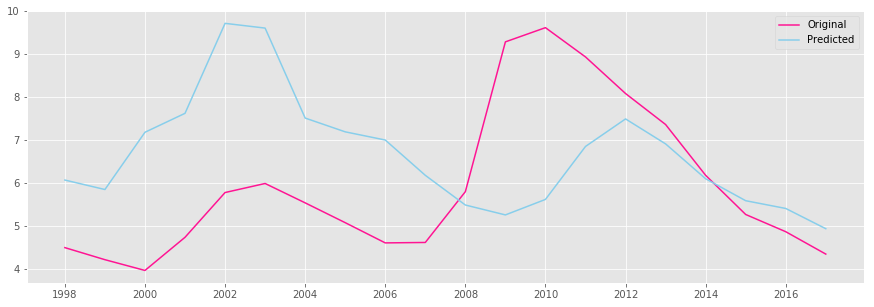

In [39]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

pred_lreg = lreg.predict(X_test)  #contains predicted result unemployment rate

# reverse the values from log
for i in range(20):
    y_test[i] = math.exp(y_test[i])  #contains original unemployment rate value
    pred_lreg[i] = math.exp(pred_lreg[i])


# last 20 years
L20y = data['Year'][50:]



fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='deeppink')
two, = ax.plot(L20y, pred_lreg, color='skyblue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

# looks like the trend is shifted. Expecially the time during the recession

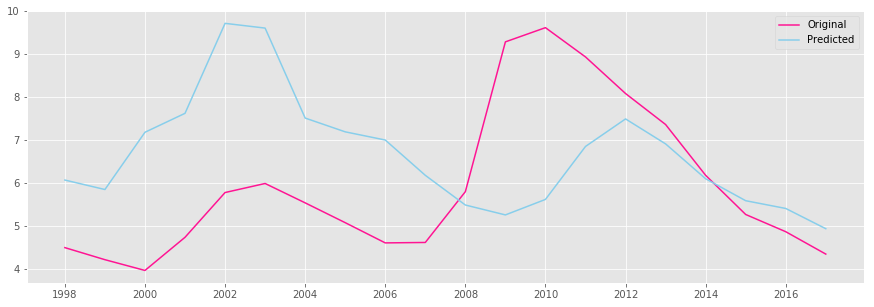

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

for i in range(20):
    pred_knn[i] = math.exp(pred_knn[i])


fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='deeppink')
two, = ax.plot(L20y, pred_knn, color='skyblue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')
